In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r'C:\\internship project\\Credit Card Fraud Risk Analysis.csv')


In [7]:
df.shape

(1000, 14)

In [9]:
df.head()

,Transaction ID,Customer Name,Merchant Name,Transaction Date,Transaction Amount (INR),Fraud Risk,Fraud Type,State,Card Type,Bank,IsFraud,Fraud Score,Transaction Category,Merchant Location
0,17797619,Pihu Manne,Uber,2024-11-10,11673,Medium,Card Not Present,Telangana,Rupay,ICICI Bank,0,57,Transportation,Bangalore
1,50040671,Hiran Vaidya,Zomato,2024-05-20,16594,Medium,Phishing,Maharashtra,Amex,SBI,0,10,Groceries,Bangalore
2,88177651,Shalv Vasa,Myntra,2024-05-28,23347,Medium,Card Skimming,Uttar Pradesh,Visa,HDFC Bank,0,55,Transportation,Ahmedabad
3,24228305,Taran Shanker,Lifestyle,2024-01-09,20753,Low,Card Skimming,Kerala,Visa,Federal Bank,0,30,E-commerce,Lucknow
4,87307869,Shanaya Kara,Tata Cliq,2024-07-27,6432,Low,Card Skimming,Delhi,Amex,SBI,0,86,Electronics,Hyderabad


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Transaction ID            1000 non-null   int64 
 1   Customer Name             1000 non-null   object
 2   Merchant Name             1000 non-null   object
 3   Transaction Date          1000 non-null   object
 4   Transaction Amount (INR)  1000 non-null   int64 
 5   Fraud Risk                1000 non-null   object
 6   Fraud Type                1000 non-null   object
 7   State                     1000 non-null   object
 8   Card Type                 1000 non-null   object
 9   Bank                      1000 non-null   object
 10  IsFraud                   1000 non-null   int64 
 11  Fraud Score               1000 non-null   int64 
 12  Transaction Category      1000 non-null   object
 13  Merchant Location         1000 non-null   object
dtypes: int64(4), object(10)
m

In [13]:
df.describe()


,Transaction ID,Transaction Amount (INR),IsFraud,Fraud Score
count,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,5.486023e+07,12226.843000,0.286000,53.179000
std,2.616482e+07,7106.084734,0.452115,25.723815
min,1.003645e+07,141.000000,0.000000,10.000000
25%,3.235345e+07,6218.000000,0.000000,29.000000
50%,5.379576e+07,11999.500000,0.000000,54.000000
75%,7.790521e+07,18207.750000,1.000000,76.000000
max,9.994398e+07,24993.000000,1.000000,95.000000


In [15]:
print(df.isnull().sum())

Transaction ID              0
Customer Name               0
Merchant Name               0
Transaction Date            0
Transaction Amount (INR)    0
Fraud Risk                  0
Fraud Type                  0
State                       0
Card Type                   0
Bank                        0
IsFraud                     0
Fraud Score                 0
Transaction Category        0
Merchant Location           0
dtype: int64


In [17]:
print("Duplicated Rows:",df.duplicated().sum())

Duplicated Rows: 0


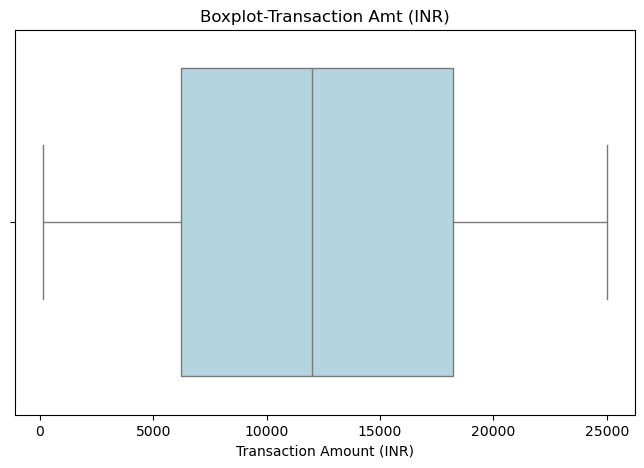

Outliers count in Transaction Amount: 0
Empty DataFrame
Columns: [Transaction ID, Customer Name, Merchant Name, Transaction Date, Transaction Amount (INR), Fraud Risk, Fraud Type, State, Card Type, Bank, IsFraud, Fraud Score, Transaction Category, Merchant Location]
Index: []


In [30]:
# showing outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Transaction Amount (INR)"],color="lightblue")
plt.title("Boxplot-Transaction Amt (INR)")
plt.show()
# by using statistical Q1,Q2,INR find outlier range
Q1 = df["Transaction Amount (INR)"].quantile(0.25)
Q3 = df["Transaction Amount (INR)"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df["Transaction Amount (INR)"] < lower) | (df["Transaction Amount (INR)"] > upper)]
print("Outliers count in Transaction Amount:", outliers.shape[0])
print(outliers.head())

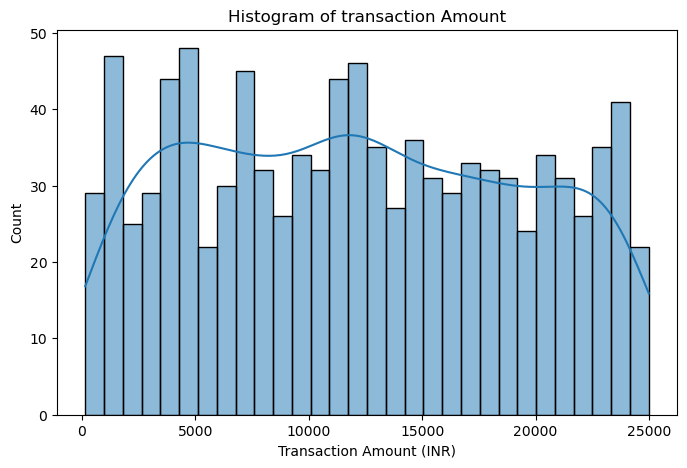

In [28]:
plt.figure(figsize=(8,5))
# showing curve use kde
# bins=group interval of data
sns.histplot(df["Transaction Amount (INR)"],bins=30,kde=True)  
plt.title("Histogram of transaction Amount")
plt.show()

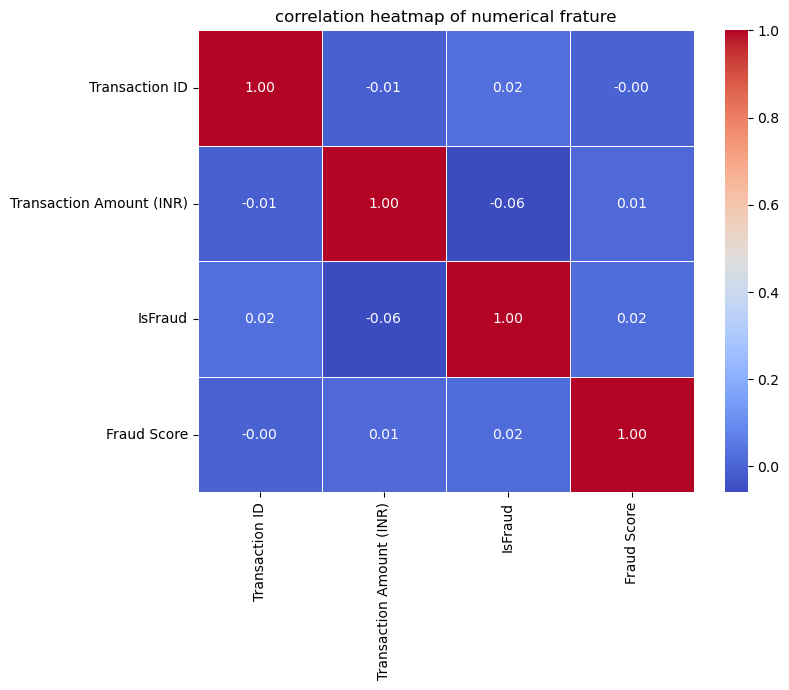

In [36]:
# correlation heatmap only numeric feature
# select numeric columns only
numeric_df=df.select_dtypes(include=['int64','float64'])
# correlation matrix
corr=numeric_df.corr()
# heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title("correlation heatmap of numerical frature")
plt.show()
# cmap='coolwarm' red=positive blue =negative
# Dark red → strong positive relation
# Dark blue → strong negative relation
# Light shades → weak relation